In [28]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier


plt.style.use('seaborn-pastel')



In [29]:
df= pd.read_csv(r'C:\Users\saedw\OneDrive\Desktop\CECS 456 Machine Learning\Data\Bank Customer Churn Prediction.csv')

In [30]:
col_cat = ['customer_id','country', 'gender', 'products_number', 'credit_card', 'active_member', 'churn', 'tenure']
for col in col_cat:
    df[col] = df[col].astype('category')

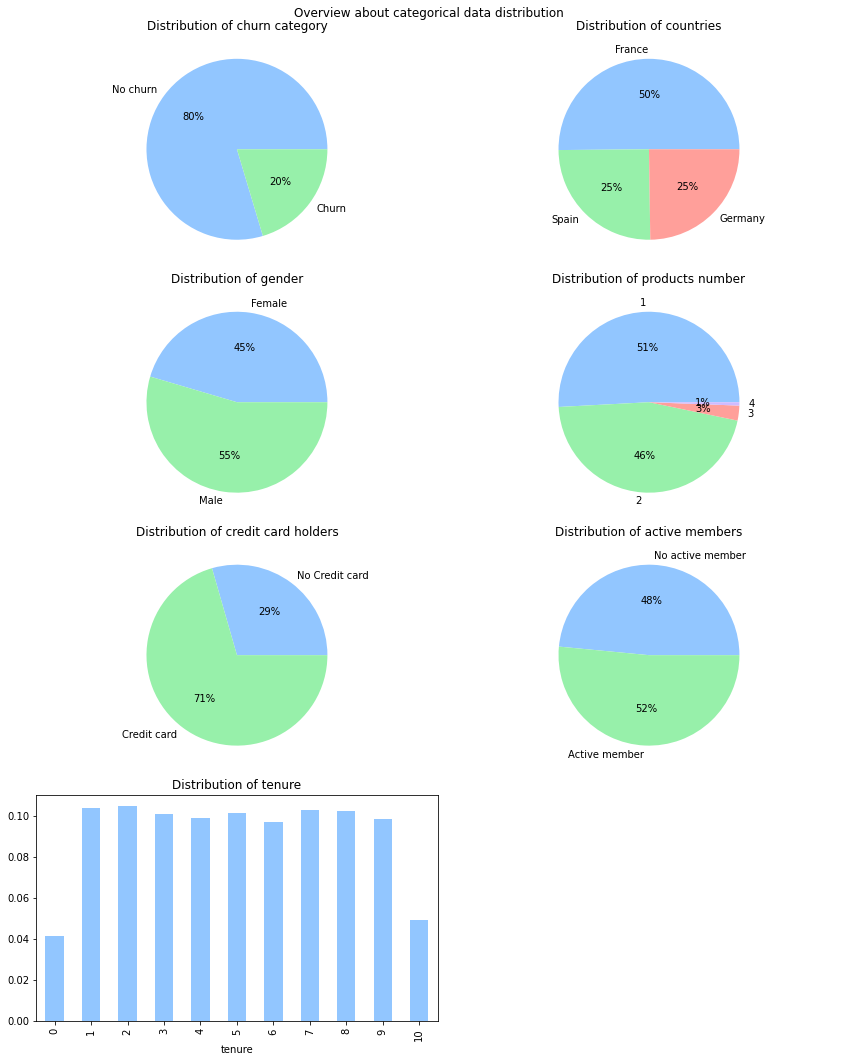

In [31]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=[12,15])
pd.crosstab(index=df.churn, columns='count', normalize=True).plot(kind='pie', y='count', autopct='%.0f%%', labels= ['No churn', 'Churn'], ylabel='', title='Distribution of churn category', legend=False, ax=ax[0,0]);
pd.crosstab(index=df.country, columns='count', normalize=True).plot(kind='pie', y='count', autopct='%.0f%%', labels= df.country.unique(), ylabel='', title='Distribution of countries', legend=False, ax=ax[0,1]);
pd.crosstab(index=df.gender, columns='count', normalize=True).plot(kind='pie', y='count', autopct='%.0f%%', labels= df.gender.unique(), ylabel='', title='Distribution of gender', legend=False, ax=ax[1,0]);
pd.crosstab(index=df.products_number, columns='count', normalize=True).plot(kind='pie', y='count', autopct='%.0f%%', labels= [1,2,3,4], ylabel='', title='Distribution of products number', legend=False, ax=ax[1,1]);
pd.crosstab(index=df.credit_card, columns='count', normalize=True).plot(kind='pie', y='count', autopct='%.0f%%', labels= ['No Credit card', 'Credit card'], ylabel='', title='Distribution of credit card holders', legend=False, ax=ax[2,0]);
pd.crosstab(index=df.active_member, columns='count', normalize=True).plot(kind='pie', y='count', autopct='%.0f%%', labels= ['No active member', 'Active member'], ylabel='', title='Distribution of active members', legend=False, ax=ax[2,1]);
pd.crosstab(index=df.tenure, columns='count', normalize=True).plot(kind='bar', title='Distribution of tenure', legend=False, ax=ax[3,0]);
ax[3,1].axis('off')
fig.suptitle('Overview about categorical data distribution')
plt.tight_layout()

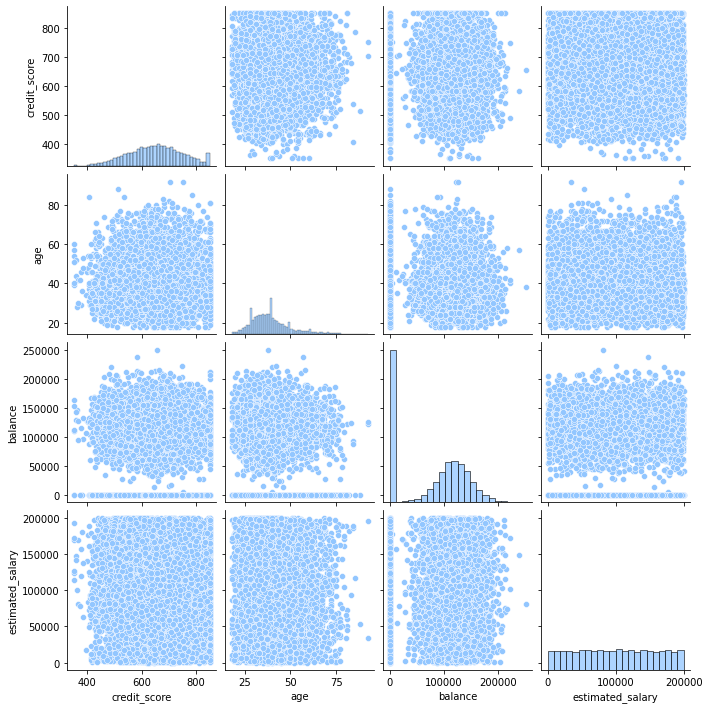

In [32]:
sns.pairplot(df)

<AxesSubplot:>

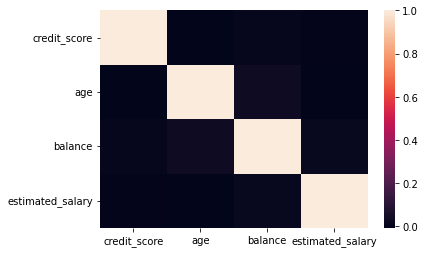

In [33]:
sns.heatmap(df.corr())

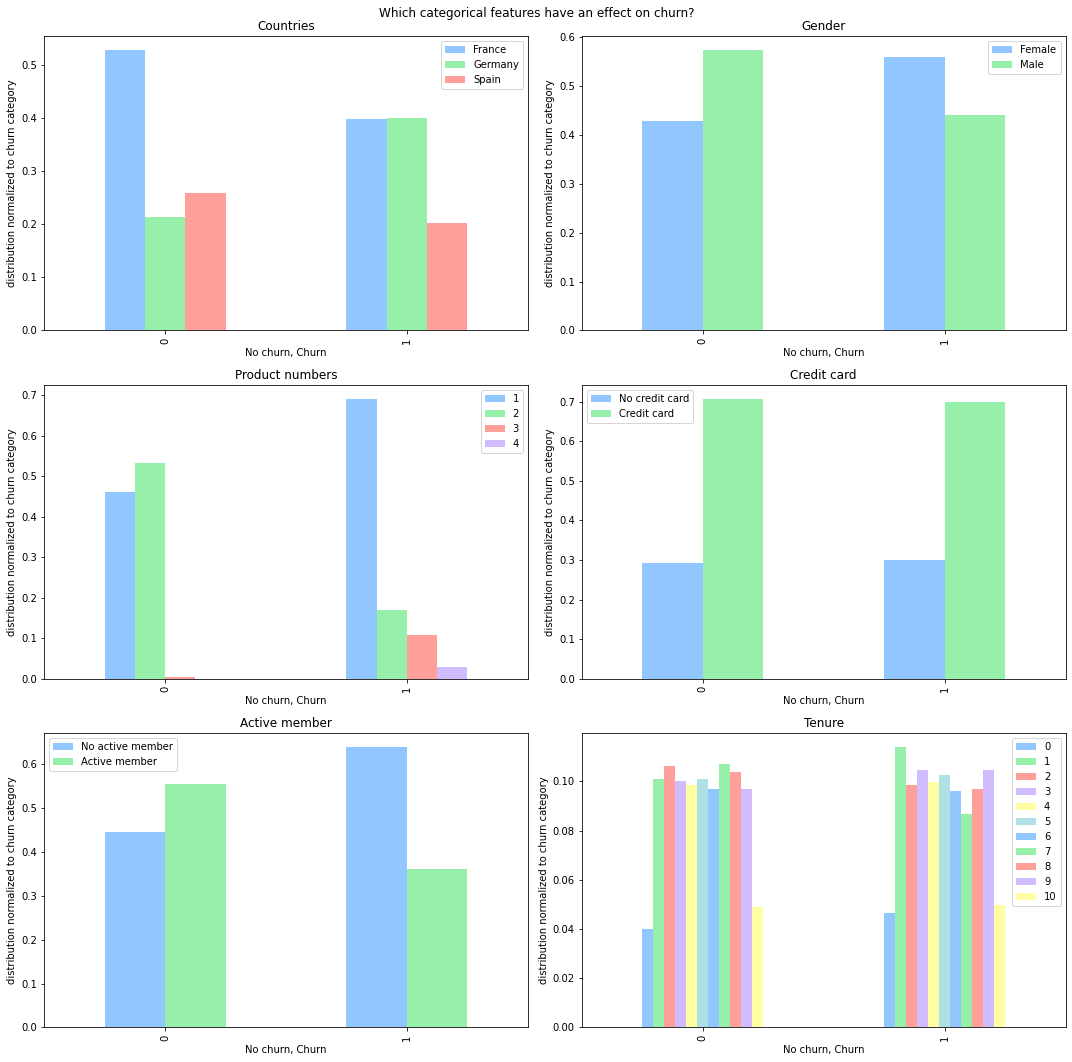

In [34]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=[15,15])

pd.crosstab(index=df.churn, columns=df.country, normalize='index').plot(kind='bar', legend=True, ax=ax[0,0], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Countries');
ax[0,0].legend(loc='best')
pd.crosstab(index=df.churn, columns=df.gender, normalize='index').plot(kind='bar', legend=True, ax=ax[0,1], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Gender');
ax[0,1].legend(loc='best')
pd.crosstab(index=df.churn, columns=df.products_number, normalize='index').plot(kind='bar', legend=True, ax=ax[1,0], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Product numbers');
ax[1,0].legend(loc='best')
pd.crosstab(index=df.churn, columns=df.credit_card, normalize='index').plot(kind='bar', legend=True, ax=ax[1,1], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Credit card');
ax[1,1].legend(labels=['No credit card','Credit card'], loc='best')
pd.crosstab(index=df.churn, columns=df.active_member, normalize='index').plot(kind='bar', legend=True, ax=ax[2,0], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Active member');
ax[2,0].legend(labels=['No active member','Active member'],loc='best')
pd.crosstab(index=df.churn, columns=df.tenure, normalize='index').plot(kind='bar', legend=True, ax=ax[2,1], ylabel='distribution normalized to churn category', xlabel= 'No churn, Churn', title='Tenure');
ax[2,1].legend(loc='best')

fig.suptitle('Which categorical features have an effect on churn?')
plt.tight_layout()

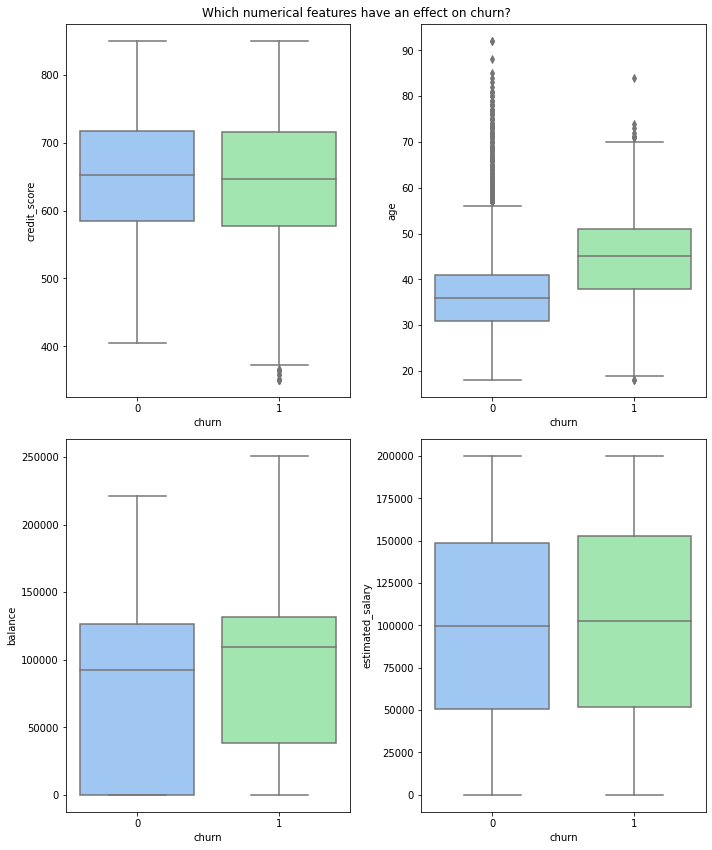

In [35]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=[10,12])

sns.boxplot(data=df, x='churn', y='credit_score',ax=ax[0,0])
sns.boxplot(data=df, x='churn', y='age',ax=ax[0,1])
sns.boxplot(data=df, x='churn', y='balance',ax=ax[1,0])
sns.boxplot(data=df, x='churn', y='estimated_salary',ax=ax[1,1])

fig.suptitle('Which numerical features have an effect on churn?')
plt.tight_layout()

In [36]:
df.drop('customer_id',axis=1, inplace=True)

In [37]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [38]:
mask_balance = df.loc[:,'balance'] == 0
print('There are {} data points with a 0 balance'.format(len(df.loc[mask_balance,:])))

There are 3617 data points with a 0 balance


In [39]:
df.loc[mask_balance,:].describe()

,credit_score,age,balance,estimated_salary
count,3617.000000,3617.000000,3617.0,3617.000000
mean,649.452861,38.434891,0.0,98983.559549
std,96.158798,10.492002,0.0,57730.828955
min,350.000000,18.000000,0.0,90.070000
25%,583.000000,31.000000,0.0,49506.820000
50%,651.000000,37.000000,0.0,98618.790000
75%,717.000000,43.000000,0.0,148330.970000
max,850.000000,88.000000,0.0,199992.480000


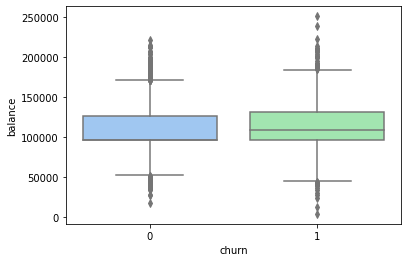

In [40]:
df_train.loc[:,'balance'].replace(0,df_train.loc[:,'balance'].median(), inplace=True)
sns.boxplot(data=df_train, x='churn', y='balance');

In [41]:
features_train = df_train.drop('churn', axis=1)
features_test = df_test.drop('churn', axis=1)
target_train = df_train.loc[:,'churn']
target_test = df_test.loc[:,'churn']

In [42]:
columns = ['country', 'gender']
ohe = OneHotEncoder(sparse=False)
encoder = ColumnTransformer([('ohe', ohe, columns)], remainder = 'passthrough')
encoder.fit(features_train)
ohe_names = encoder.named_transformers_['ohe'].get_feature_names_out(columns)
remaining_names= features_train.columns[encoder._remainder[2]]
features_train_ohe = pd.DataFrame(encoder.transform(features_train), columns=list(ohe_names) + list(remaining_names))

In [43]:
rf_base = RandomForestClassifier(class_weight='balanced', random_state=0)
cv_base = cross_val_score(estimator = rf_base, 
                          X=features_train_ohe, 
                          y=target_train, 
                          scoring='f1', 
                          cv=5, 
                          n_jobs=-1)
print(cv_base.mean())

0.5621516474310984


In [44]:
rf_base.fit(features_train_ohe,target_train)
feat_imp_base = pd.DataFrame(rf_base.feature_importances_, index= features_train_ohe.columns).sort_values(by=0)
print(feat_imp_base)

                         0
country_Spain     0.009933
gender_Female     0.010856
gender_Male       0.011383
country_France    0.013159
credit_card       0.018137
country_Germany   0.025123
active_member     0.038556
tenure            0.081917
products_number   0.125545
credit_score      0.133313
estimated_salary  0.137789
balance           0.143807
age               0.250482


In [45]:
scores = ['recall', 'f1', 'precision']

In [46]:
model_rf = RandomForestClassifier(class_weight='balanced', random_state=0)
search_space_rf = {'n_estimators': [100, 300, 1000],
                   'max_features': ['auto', 'sqrt'],
                   'max_depth': [1, 10, 100, None],
                   'min_samples_leaf': [1, 2, 4]}

for score in scores:
    grid_rf = GridSearchCV(estimator = model_rf, 
                       param_grid = search_space_rf, 
                       scoring=score, 
                       n_jobs=-1, 
                       cv=5)

    grid_rf.fit(X=features_train_ohe, 
            y=target_train)

    print('score: {}\n - best score:{} \n best params:{} \n'.format(score, grid_rf.best_score_, grid_rf.best_params_))

C:\Users\saedw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


score: recall
 - best score:0.7238323819408408 
 best params:{'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100} 



KeyboardInterrupt: 

In [47]:
scaler = StandardScaler()
features_train_ohe_scaled = scaler.fit_transform(features_train_ohe)
model_knn = KNeighborsClassifier()

k_range = list(range(1, 31))

search_space_knn = {'n_neighbors' : k_range}

for score in scores:
    grid_knn = GridSearchCV(estimator = model_knn, 
                            param_grid = search_space_knn, 
                            scoring=score, 
                            n_jobs=-1, 
                            cv=5)
    
    grid_knn.fit(X=features_train_ohe_scaled, 
                 y=target_train, )
    
    print('score: {}\n - best score:{} \n best params:{} \n'.format(score, grid_knn.best_score_, grid_knn.best_params_))  

score: recall
 - best score:0.4604603751204685 
 best params:{'n_neighbors': 1} 

score: f1
 - best score:0.47357711417109816 
 best params:{'n_neighbors': 1} 

score: precision
 - best score:0.7594812914321893 
 best params:{'n_neighbors': 26} 



In [ ]:
model_rf_1 = RandomForestClassifier(max_depth= 1, max_features = 'auto', min_samples_leaf = 1, n_estimators = 100, class_weight='balanced', random_state=0)

for score in scores:
    crossval_1 = cross_val_score(estimator = model_rf_1 , 
                                 X = features_train_ohe, 
                                 y = target_train, 
                                 scoring = score, 
                                 cv = 5, 
                                 n_jobs = -1)

    print('score: {}\n - mean score: {} \n'.format(score, crossval_1.mean()))

In [ ]:
model_rf_2 = RandomForestClassifier(max_depth= 10, max_features = 'auto', min_samples_leaf = 2, n_estimators = 1000, class_weight='balanced', random_state=0)

for score in scores:
    crossval_2 = cross_val_score(estimator = model_rf_2 , 
                                 X = features_train_ohe, 
                                 y = target_train, 
                                 scoring = score, 
                                 cv = 5, 
                                 n_jobs = -1)

    print('score: {}\n - mean score: {} \n'.format(score, crossval_2.mean()))

In [ ]:
model_rf_3 = RandomForestClassifier(max_depth= 100, max_features = 'auto', min_samples_leaf = 1, n_estimators = 300, class_weight='balanced', random_state=0)

for score in scores:
    crossval_3 = cross_val_score(estimator = model_rf_3 , 
                                 X = features_train_ohe, 
                                 y = target_train, 
                                 scoring = score, 
                                 cv = 5, 
                                 n_jobs = -1)

    print('score: {}\n - mean score: {} \n'.format(score, crossval_3.mean()))

In [ ]:
model_knn_1 = KNeighborsClassifier(n_neighbors = 26)

for score in scores:
    crossval_4 = cross_val_score(estimator = model_knn_1 , 
                                 X = features_train_ohe_scaled, 
                                 y = target_train, 
                                 scoring = score, 
                                 cv = 5, 
                                 n_jobs = -1)

    print('score: {}\n - mean score: {} \n'.format(score, crossval_4.mean()))

In [ ]:
features_test_ohe = pd.DataFrame(encoder.transform(features_test), columns=list(ohe_names) + list(remaining_names))
model_rf_2.fit(features_train_ohe, target_train)
pred_target_test = model_rf_2.predict(features_test_ohe)

In [ ]:
recall = recall_score(target_test, pred_target_test)
f1 = f1_score(target_test, pred_target_test)
precision = precision_score(target_test, pred_target_test)

In [ ]:
print('Final scores \n')
results = pd.DataFrame(np.array([recall, f1, precision]), columns=['results'], index=['recall', 'f1', 'precision'])
print(results)

In [ ]:
matrix = confusion_matrix(target_test, pred_target_test, labels=model_rf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model_rf_2.classes_)
disp.plot();